In [1]:
# imports and setup
%matplotlib inline

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

pd.set_option('precision', 4) # number precision for pandas
pd.set_option('display.max_rows', 12)
pd.set_option('display.max_columns', 12)
pd.set_option('display.float_format', '{:20,.5f}'.format) # get rid of scientific notation

plt.style.use('seaborn') # pretty matplotlib plots

In [2]:
#Fitting classification models
carseats=pd.read_csv('/Users/appler/Desktop/ISLR/Carseats.csv',index_col=0)

A data frame with 400 observations on the following 11 variables.

Sales
Unit sales (in thousands) at each location

CompPrice
Price charged by competitor at each location

Income
Community income level (in thousands of dollars)

Advertising
Local advertising budget for company at each location (in thousands of dollars)

Population
Population size in region (in thousands)

Price
Price company charges for car seats at each site

ShelveLoc
A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site

Age
Average age of the local population

Education
Education level at each location

Urban
A factor with levels No and Yes to indicate whether the store is in an urban or rural location

US
A factor with levels No and Yes to indicate whether the store is in the US or not

# 8.3.1 Fitting classification trees

In [3]:
carseats['High']=(carseats['Sales']>8).map({True:'Yes', False:'No'})
#创建销售数值类别变量high

In [4]:
carseats.loc[:,['ShelveLoc','Urban','US','High']]=\
carseats.loc[:,['ShelveLoc','Urban','US','High']].apply(pd.Categorical)

In [5]:
#把类别变量转化为哑变量。ShelveLoc:2,1,0; Urban:1,0 US:1,0
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
le = LabelEncoder()
carseats['ShelveLoc'] = le.fit_transform(carseats['ShelveLoc'])
carseats['Urban'] = le.fit_transform(carseats['Urban'])
carseats['US'] = le.fit_transform(carseats['US'])
X = carseats.loc[:, 'CompPrice':'US']
y = carseats.loc[:, 'High']

In [6]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
tree_carseats=DecisionTreeClassifier(min_samples_leaf=5, max_depth=6)
tree_carseats.fit(X,y)
y_pred=tree_carseats.predict(X)
print("Accuracy: ",tree_carseats.score(X,y))

Accuracy:  0.8775


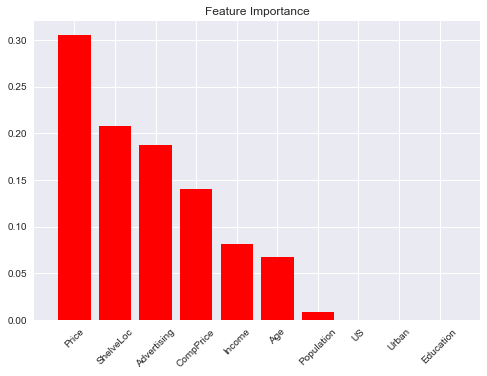

In [7]:
#feature importance
from scikitplot.estimators import plot_feature_importances
plot_feature_importances(tree_carseats, feature_names=X.columns, x_tick_rotation=45)

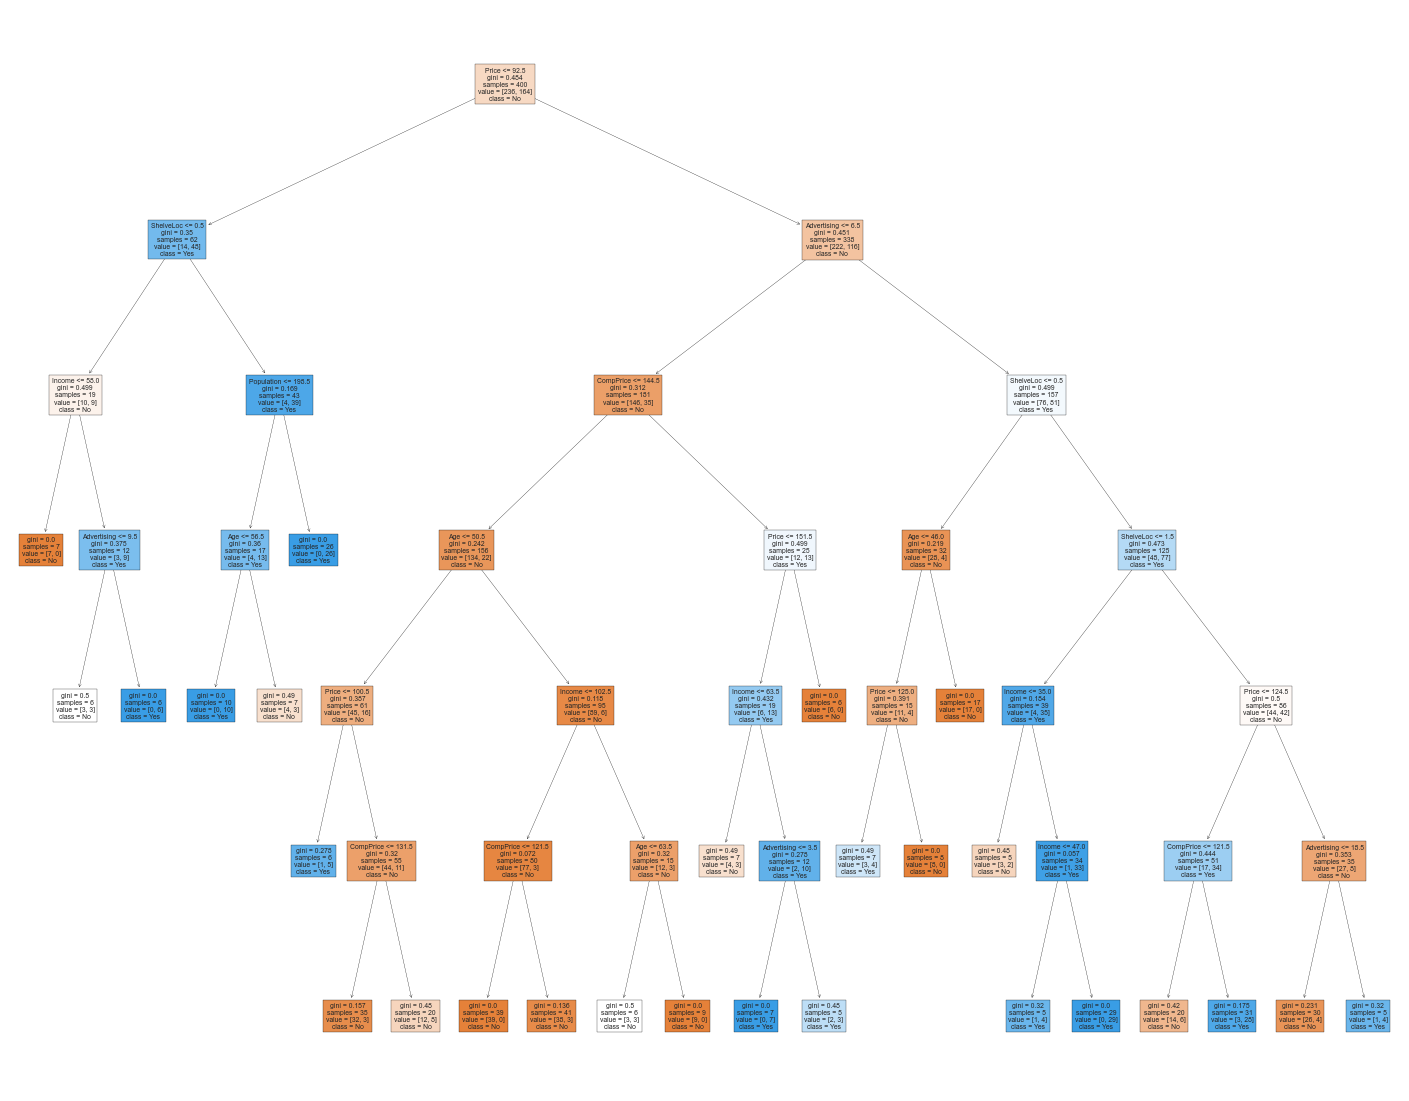

In [8]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_carseats, 
                   feature_names=X.columns,  
                   class_names=tree_carseats.classes_,
                   filled=True)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.5,test_size=0.5,random_state=42)

In [10]:
#决策树在训练集的分类效果是0.9，测试集是0.73
tree_carseats_tt=DecisionTreeClassifier(min_samples_leaf=5, max_depth=6)
tree_carseats_tt.fit(X_train,y_train)
y_pred=tree_carseats_tt.predict(X_test)

tree_carseats_tt.score(X_train,y_train), tree_carseats_tt.score(X_test,y_test)

(0.9, 0.73)

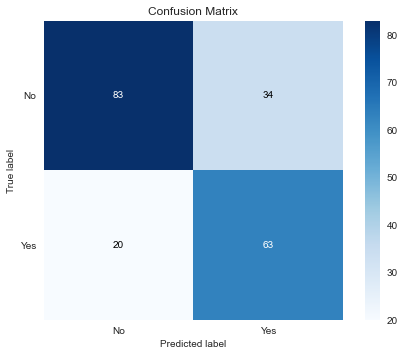

In [11]:
from scikitplot.metrics import plot_confusion_matrix
plot_confusion_matrix(y_test,y_pred)

# 8.3.2 Fitting Regression Trees

In [12]:
boston=pd.read_csv('/Users/appler/Desktop/ISLR/Boston.csv',index_col=0)

X=boston.loc[:,'crim':'lstat']
y=boston.loc[:,'medv']

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.5,test_size=0.5,random_state=42)

The Boston data frame has 506 rows and 14 columns (predictors). We have descriptions and summaries of predictors as follow:

crim: per capita crime rate by town.

zn: proportion of residential land zoned for lots over 25,000 sq.ft.

indus: proportion of non-retail business acres per town.

chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

nox: nitrogen oxides concentration (parts per 10 million).

rm: average number of rooms per dwelling.

age: proportion of owner-occupied units built prior to 1940.

dis: weighted mean of distances to five Boston employment centres.

rad: index of accessibility to radial highways.

tax: full-value property-tax rate per $10,000.

ptratio: pupil-teacher ratio by town.

black: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

lstat: lower status of the population (percent).

medv: median value of owner-occupied homes in $1000s.

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

tree_boston=DecisionTreeRegressor(min_samples_leaf=5, max_depth=2)
tree_boston.fit(X_train,y_train)
y_pred=tree_boston.predict(X_test)
tree_boston.score(X_train,y_train),tree_boston.score(X_test,y_test)

(0.7461422238084279, 0.6349503884695382)

In [14]:
print('Decision Tree MSE: ',mean_squared_error(y_test,y_pred))

Decision Tree MSE:  29.61657153691858


/Users/appler/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:1254: FutureWarning: the classes_ attribute is to be deprecated from version 0.22 and will be removed in 0.24.
  warnings.warn(msg, FutureWarning)


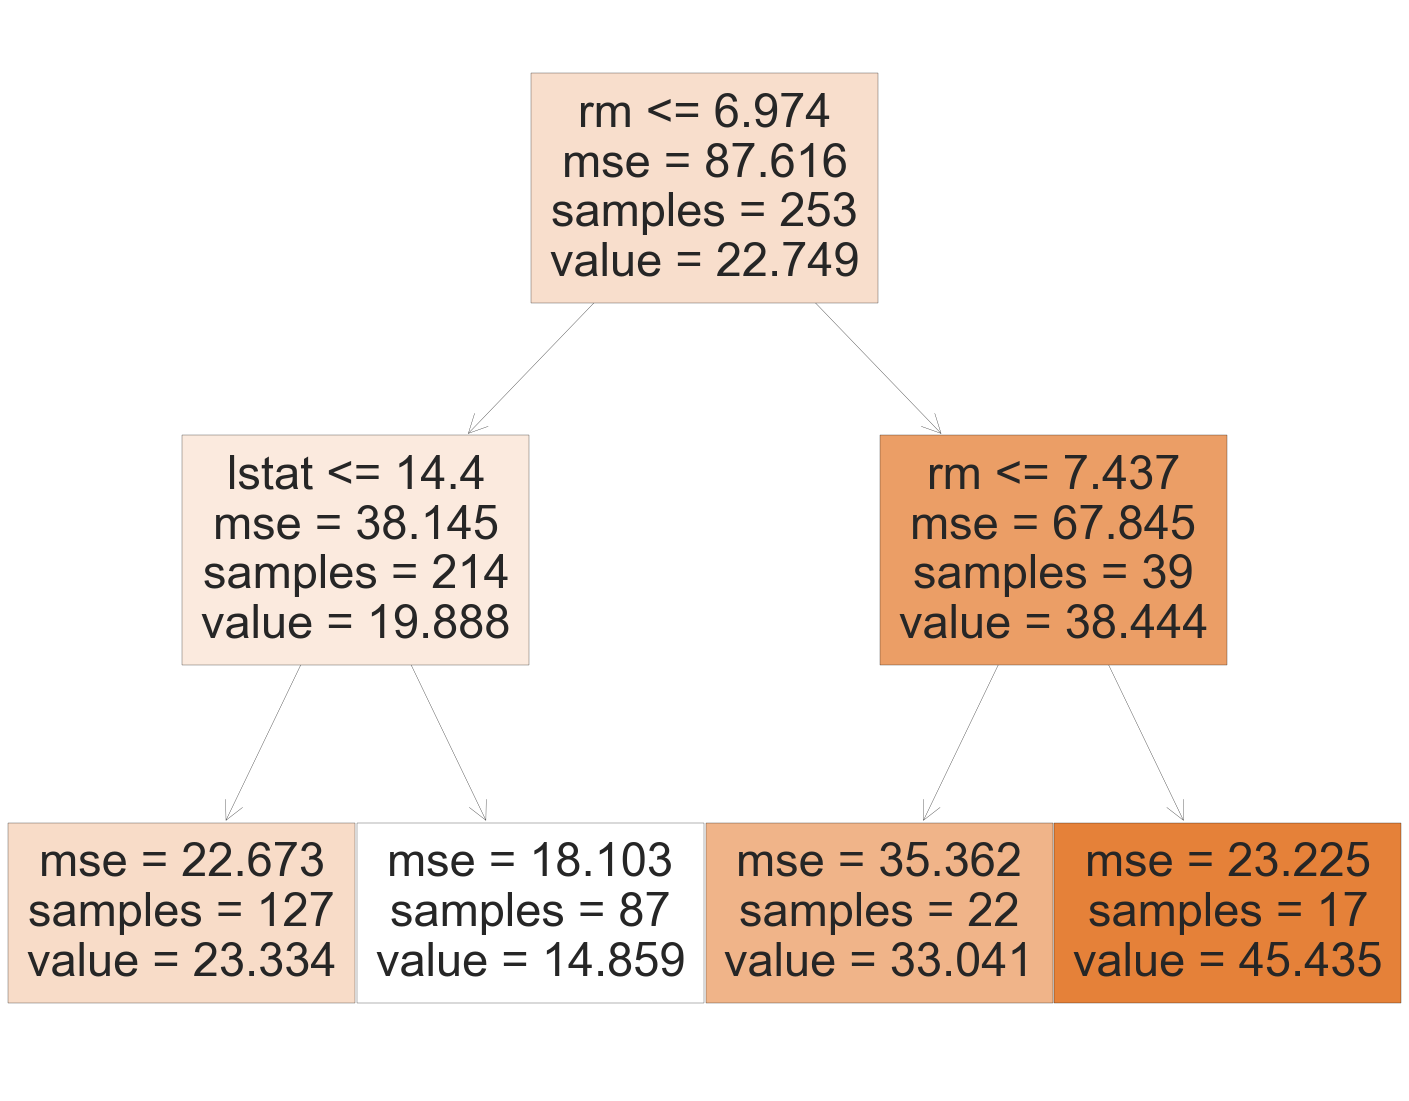

In [15]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_boston, 
                   feature_names=X.columns,  
                   class_names=tree_boston.classes_,
                   filled=True)

# 8.3.3 Bagging and Random Forest

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

boston_bag = RandomForestRegressor(max_features=13, random_state=42)
boston_bag.fit(X_train,y_train)

y_pred=boston_bag.predict(X_test)

print('Bagging MSE: ',mean_squared_error(y_test,y_pred))

Bagging MSE:  14.667482976284576


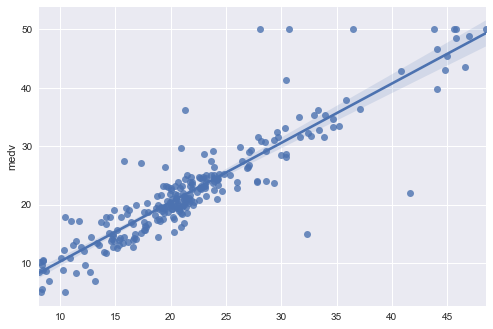

In [17]:
sns.regplot(y_pred,y_test)

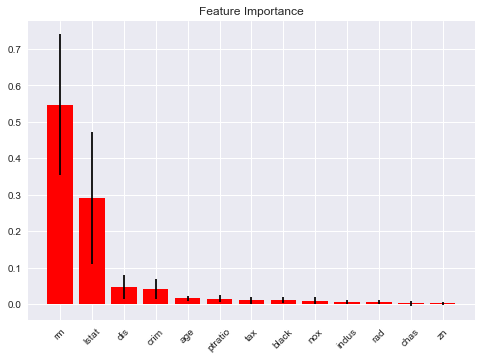

In [18]:
plot_feature_importances(boston_bag,
                       feature_names=X.columns,
                       x_tick_rotation=45)

In [19]:
boston_bag.feature_importances_

array([0.04101368, 0.0015869 , 0.00589552, 0.0018398 , 0.00939845,
       0.54730331, 0.01532094, 0.04604744, 0.00543593, 0.01069444,
       0.01406426, 0.01034914, 0.29105019])

# 8.3.3 random forest model

In [20]:
boston_rf=RandomForestRegressor(max_features=6,random_state=42,n_estimators=100)
boston_rf.fit(X_train,y_train)
y_pred=boston_rf.predict(X_test)
print('Random Forest Model MSE: ', mean_squared_error(y_test,y_pred))

Random Forest Model MSE:  12.878658150197625


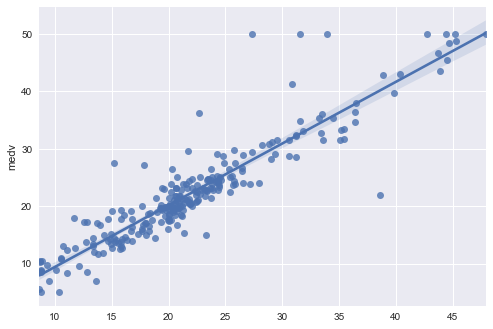

In [21]:
sns.regplot(y_pred,y_test)

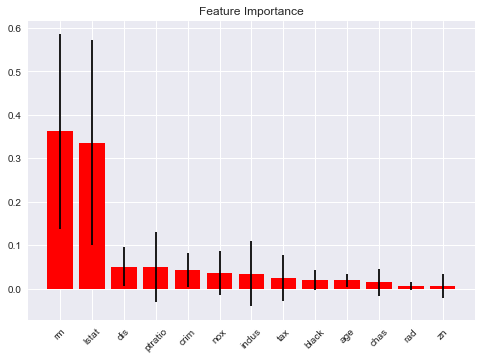

In [22]:
plot_feature_importances(boston_rf,
                       feature_names=X.columns,
                       x_tick_rotation=45)

In [23]:
boston_rf.feature_importances_

array([0.04248258, 0.00602378, 0.03462752, 0.01404938, 0.03494768,
       0.36211622, 0.01882368, 0.05064702, 0.00656457, 0.02517942,
       0.04940829, 0.01920868, 0.33592117])

# 8.3.4 Boosting

In [24]:
from sklearn.ensemble import GradientBoostingRegressor

boston_gb=GradientBoostingRegressor(n_estimators=500, learning_rate=0.01,max_depth=4,random_state=42)
boston_gb.fit(X_train,y_train)

y_pred=boston_gb.predict(X_test)
print('Boosting model MSE: ', mean_squared_error(y_test,y_pred))

Boosting model MSE:  16.770864624119454


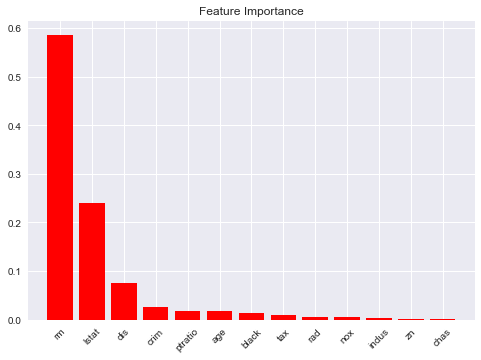

In [25]:
plot_feature_importances(boston_gb,
                       feature_names=X.columns,
                       x_tick_rotation=45)

In [26]:
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence

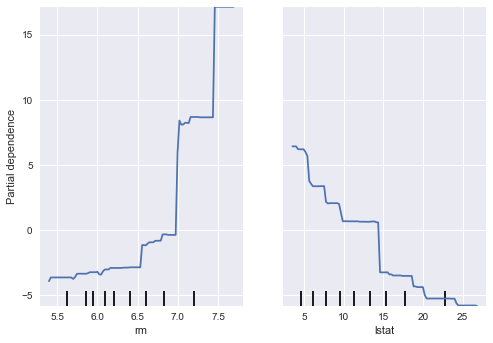

In [27]:
plot_partial_dependence(boston_gb,X_train,[5,12],feature_names=X.columns)

In [28]:
#把learning rate从0.01提升到0.2，MSE比第一个gradient boosting model变得更好了，MSE变小
boston_gb2=GradientBoostingRegressor(n_estimators=500, learning_rate=0.2,max_depth=4,random_state=42)
boston_gb2.fit(X_train,y_train)

y_pred=boston_gb2.predict(X_test)
print('Boosting model2 MSE: ', mean_squared_error(y_test,y_pred))

Boosting model2 MSE:  15.275731192364155


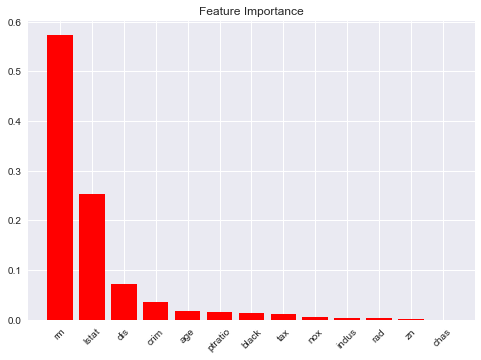

In [29]:
plot_feature_importances(boston_gb2,
                       feature_names=X.columns,
                       x_tick_rotation=45)